```
Student-1
Name:
ID#
```

```
Student-2
Name:
ID#
```

```
Student-3
Name:
ID#
```



*   Mount your google drive.



In [20]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import all necessary libraries.



In [21]:
# load/import all required library

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [22]:
# write task-1 solution

# start writing your code here

np.random.seed(123)
df = pd.read_csv('/content/drive/My Drive/Fake_Real_News_Data.csv')

print(df)

      Unnamed: 0                                              title  \
0              0  A whirlwind day in D.C. showcases Trump’s unor...   
1              1  In Baltimore's call for federal police probe, ...   
2              2  Trump Proudly Declares: Most Of The People I’v...   
3              3  Inside the Trump-Bush melodrama: Decades of te...   
4              4      Shutdown clash to return in force by December   
...          ...                                                ...   
6330        6330  Obama To Limit Police Acquisition Of Some Mili...   
6331        6331  EU using taxpayer money to give Muslim invader...   
6332        6332  Watching These 55 ISIS Terrorists Get Blown to...   
6333        6333  America’s Streets Will Run With Blood- Mike Adams   
6334        6334                              The immigration swamp   

                                                   text label  
0     Donald Trump endorsed an unabashedly noninterv...  REAL  
1     While some Ju

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [30]:
# write task-2 solution

# start writing your code here

#Remove duplicate records
print("Original dataset shape:", df.shape)
df = df.drop_duplicates()
print("Dataset shape after removing duplicates:", df.shape)

#Check for missing values
print("\nMissing values in each column before cleaning:")
print(df.isnull().sum())

#Replace missing values. For 'title' and 'text', replace missing values with an empty string
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')

#For 'label', replace missing values with the mode (most frequent value)
df['label'] = df['label'].fillna(df['label'].mode()[0])

#Recheck for missing values
print("\nMissing values in each column after cleaning:")
print(df.isnull().sum())

#Display the cleaned dataset summary
print("\nCleaned dataset preview:")
print(df.head())

Original dataset shape: (6335, 4)
Dataset shape after removing duplicates: (6335, 4)

Missing values in each column before cleaning:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

Missing values in each column after cleaning:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

Cleaned dataset preview:
   Unnamed: 0                                              title  \
0           0  A whirlwind day in D.C. showcases Trump’s unor...   
1           1  In Baltimore's call for federal police probe, ...   
2           2  Trump Proudly Declares: Most Of The People I’v...   
3           3  Inside the Trump-Bush melodrama: Decades of te...   
4           4      Shutdown clash to return in force by December   

                                                text  label  
0  Donald Trump endorsed an unabashedly noninterv...      1  
1  While some Justice Department investigations a...      1  
2  Trump Proudly Declares: Most Of The People

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

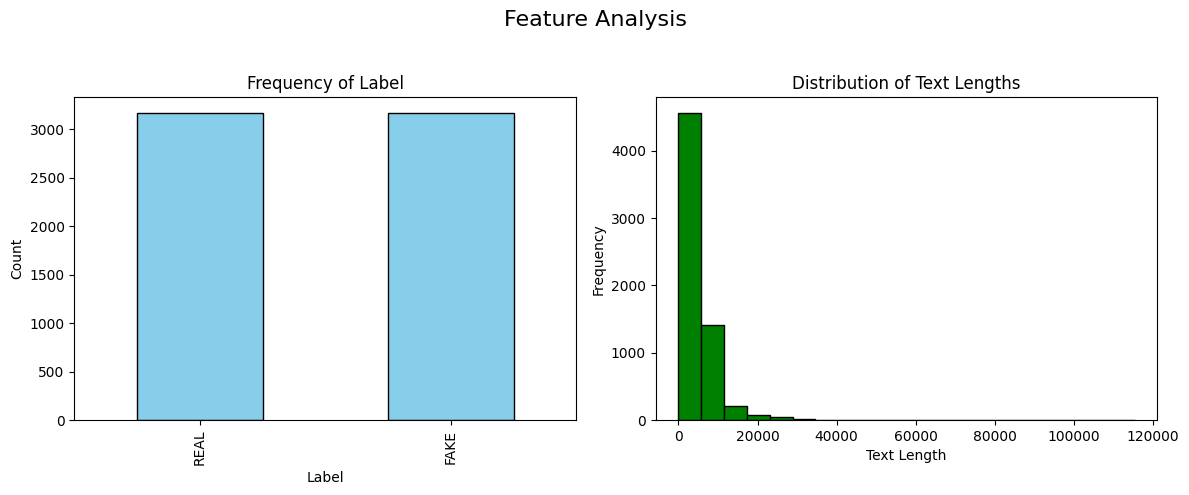

In [24]:
import matplotlib.pyplot as plt

# Create subplots for two features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Feature Analysis', fontsize=16)

# Plot 1: Frequency of 'label'
df['label'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of Label')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

# Plot 2: Distribution of text lengths
df['text'].str.len().plot(kind='hist', bins=20, ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Distribution of Text Lengths')
axes[1].set_xlabel('Text Length')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [25]:
# write task-4 solution

# start writing your code here


# Assuming 'df' is your DataFrame
if 'label' in df.columns:
    df['label'] = df['label'].map({'REAL': 1, 'FAKE': 0})

# Scale numeric features
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['float64', 'int64'])),
                         columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Display the scaled data preview
print(scaled_df.head())


   Unnamed: 0     label
0   -1.731777  0.998896
1   -1.731231  0.998896
2   -1.730684 -1.001106
3   -1.730137  0.998896
4   -1.729590  0.998896


•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [26]:
# write task-5 solution

# start writing your code here

# Convert text to numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['title'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3241)

# Display the sizes of the training and testing sets
print("Training feature set size:", X_train.shape)
print("Testing feature set size:", X_test.shape)
print("Training target set size:", y_train.shape)
print("Testing target set size:", y_test.shape)


Training feature set size: (5068, 5000)
Testing feature set size: (1267, 5000)
Training target set size: (5068,)
Testing target set size: (1267,)


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [27]:
# write task-6 solution

# start writing your code here

from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=3241)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display actual vs predicted labels
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(comparison.head())


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       625
           1       0.83      0.80      0.81       642

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267


Actual vs Predicted:
      Actual  Predicted
227        1          1
3436       1          1
6150       1          0
548        0          0
5121       0          0


•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

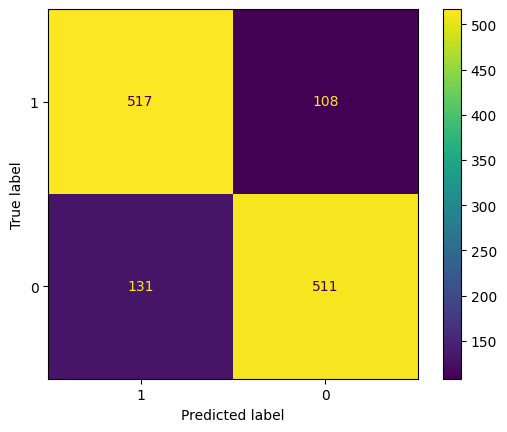

In [28]:
# write task-7 solution

# start writing your code here

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
cm_display.plot()
plt.show()

•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [29]:
# write task-8 solution

# start writing your code here

from sklearn.metrics import accuracy_score

# Calculate and print training and testing accuracy
train_accuracy = accuracy_score(y_train, svm_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Compare train and test accuracy
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("The model might be underfitting.")
else:
    print("The model has consistent performance.")


Training Accuracy: 93.96%
Testing Accuracy: 81.14%
The model might be overfitting.
